## Fake Currency note detection

The given dataset has following 4 featues

1.The variance of the image transformed into wavelets

2.The asymmetry of the image transformed into wavelets

3.Kurtosis of the image transformed into wavelets

4.Image entropy

### Objective:

Need to classify whether the currency note was fake or real, it was a binary classification problem

If it is real '0' and if it is fake '1'

In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('bank_note_data.txt', header=None)
data.columns = ['variance', 'skewness', 'kurtosis', 'entropy', 'authenticity']
data

,variance,skewness,kurtosis,entropy,authenticity
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
data.describe()

,variance,skewness,kurtosis,entropy,authenticity
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   variance      1372 non-null   float64
 1   skewness      1372 non-null   float64
 2   kurtosis      1372 non-null   float64
 3   entropy       1372 non-null   float64
 4   authenticity  1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Note:

Here no null( missing) values are found in the given dataset

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

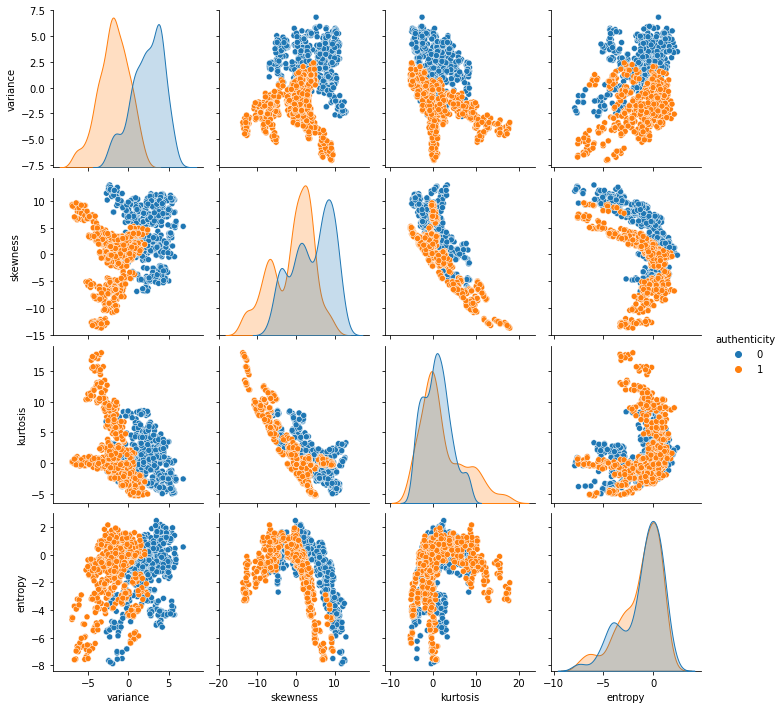

In [29]:
sns.pairplot(data, hue='authenticity')
plt.show()

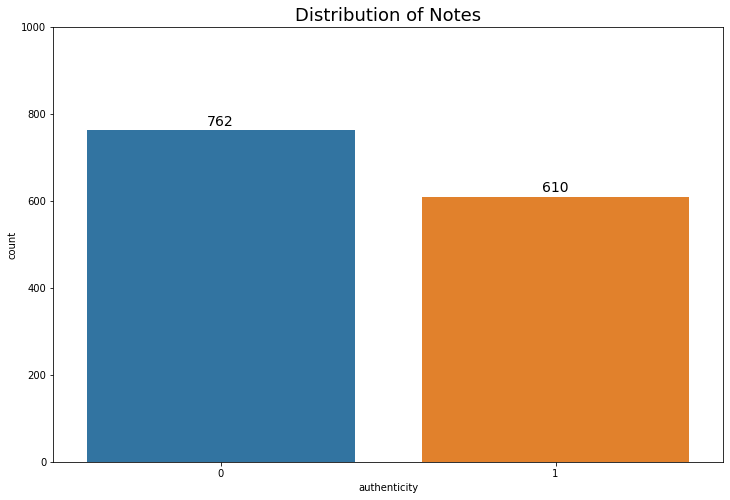

In [12]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Notes', size=18)
sns.countplot(x=data['authenticity'])
target_count = data.authenticity.value_counts()
plt.annotate(text=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(text=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,1000)
plt.show()

Note :
 The dataset is fairly balanced, but for the binary classification task, even little variation also effects the end result.
 So in order to make it balance, here overrepresented notes were removed that is known Undersampling was performed

In [13]:
nb_to_delete = target_count[0] - target_count[1]
data = data.sample(frac=1, random_state=42).sort_values(by='authenticity')
data = data[nb_to_delete:]
print(data['authenticity'].value_counts())

0    610
1    610
Name: authenticity, dtype: int64


In [14]:
x = data.loc[:, data.columns != 'authenticity']
y = data.loc[:, data.columns == 'authenticity']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto')
model.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=42)

In [20]:
from sklearn.metrics import confusion_matrix

In [22]:
y_predict = np.array(model.predict(x_test))
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_predict),
                        columns=["Predicted.Negative", "Predicted.Positive"],
                        index=['Actual.Negative', "Actual.Positive"])
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4)
print(confusion_mat)
print(f'\n Accuracy = {round(100*accuracy, 2)}%')

                 Predicted.Negative  Predicted.Positive
Actual.Negative                 124                   4
Actual.Positive                   0                 116

 Accuracy = 98.36%


In [23]:
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
new_banknote = scalar.transform(new_banknote)
print(f'Prediction:  Class{model.predict(new_banknote)[0]}')
print(f'Probability [0/1]:  {model.predict_proba(new_banknote)[0]}')

Prediction:  Class0
Probability [0/1]:  [0.65490385 0.34509615]


### Conclusion:
•	Performed data cleaning and preprocessing and trained for modeling, Logistic regression model achieved an accuracy of        98.36% not only that model is predicted it was real and correct all the time